#Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

#Load and Preprocess MNIST

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


11490434/11490434 [==============================] - 0s 0us/step


#Build LeNet-5

In [3]:
model = Sequential()
model.add(Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(AveragePooling2D())
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(AveragePooling2D())
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

#Compile Model using Adam optimizer and Categorical Crossentropy Loss Function

In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 6ms/step - loss: 0.4270 - accuracy: 0.8746 - val_loss: 0.1406 - val_accuracy: 0.9585
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1280 - accuracy: 0.9611 - val_loss: 0.0983 - val_accuracy: 0.9714
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0935 - accuracy: 0.9716 - val_loss: 0.0953 - val_accuracy: 0.9712
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0749 - accuracy: 0.9771 - val_loss: 0.0706 - val_accuracy: 0.9787
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0624 - accuracy: 0.9805 - val_loss: 0.0628 - val_accuracy: 0.9815
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0543 - accuracy: 0.9825 - val_loss: 0.0758 - val_accuracy: 0.9780
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0487 - accuracy: 0.9841 - val_loss: 0.0609 - val_accuracy: 0.9816
Epoch 

#Model Evaluation

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

Test loss: 0.03581920638680458
Test accuracy: 0.9878000020980835


#Generate Confusion Matrix and Classification Report

313/313 [==============================] - 1s 2ms/step


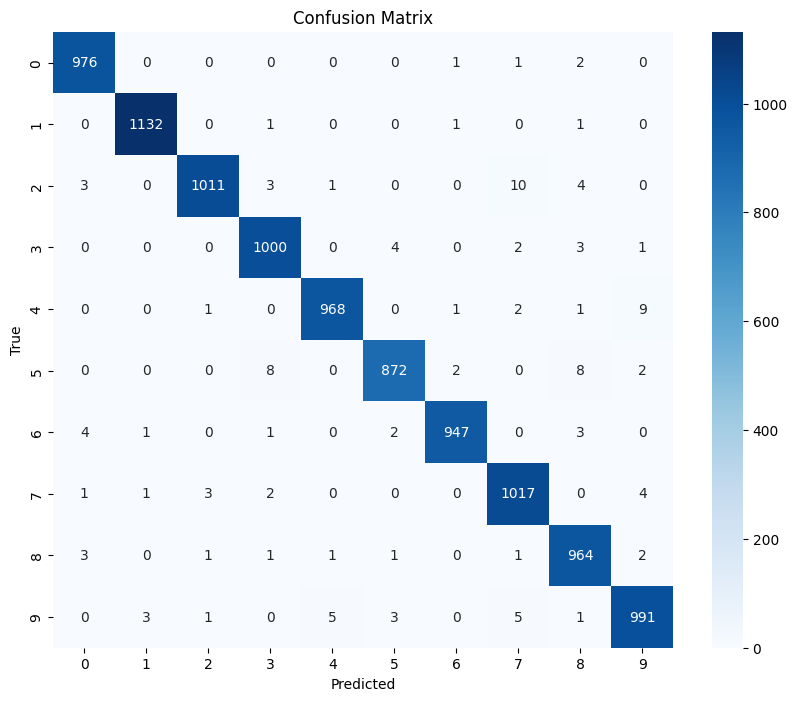

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.98      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [6]:
#Confusion matrix

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#Classification report

class_report = classification_report(y_true, y_pred_classes)
print("Classification Report:\n", class_report)